# Desafío Spike
## Pregunta 1
Primero importamos los datos desde 'caudal_extra.csv' usando pandas.
Antes de importar se revisó visualmente los nombres de las columnas,
ya que en el documento del desafío se indicó que una de las columnas contiene la estampa de tiempo de las mediciones.
Con esto importamos, dejando la columna 'fecha' como el index del DataFrame, debido que queremos revisar los datos como series de tiempo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [2]:
df = pd.read_csv('caudal_extra.csv', sep=',', 
                 parse_dates={'dt' : ['fecha']}, infer_datetime_format=True, 
                 low_memory=False, index_col='dt').sort_index()


## Pregunta 2
Revisamos las columnas y los tipos de datos que contiene.

In [3]:
df.head()


Unnamed: 0  codigo_estacion institucion   fuente  \
dt                                                                            
1960-01-02 00:00:00+00:00     1119288          4523002         DGA  dga_web   
1960-01-02 00:00:00+00:00      454431          5423003         DGA  dga_web   
1960-01-02 00:00:00+00:00      995307          8106001         DGA  dga_web   
1960-01-02 00:00:00+00:00     1023632          4716001         DGA  dga_web   
1960-01-02 00:00:00+00:00     1158812          8132001         DGA  dga_web   

                                                    nombre  altura    latitud  \
dt                                                                              
1960-01-02 00:00:00+00:00  Rio Grande En Puntilla San Juan     420 -30.704700   
1960-01-02 00:00:00+00:00         Rio Aconcagua En Romeral     365 -32.840302   
1960-01-02 00:00:00+00:00          Rio ÑUble En San Fabian     410 -36.570301   
1960-01-02 00:00:00+00:00          Rio Choapa En Lamahuida     275 -31.742201   
1960-01-02 00:00:00+00:00    Rio Diguillin En Longitudinal      80 -36.866699   

                            longitud  codigo_cuenca  \
dt                                                    
1960-01-02 00:00:00+00:00 -70.924400             45   
1960-01-02 00:00:00+00:00 -71.025597             54   
1960-01-02 00:00:00+00:00 -71.554703             81   
1960-01-02 00:00:00+00:00 -71.149200             47   
1960-01-02 00:00:00+00:00 -72.333298             81   

                                                          nombre_sub_cuenca  \
dt                                                                            
1960-01-02 00:00:00+00:00  Rio Grande Medio (Arriba Junta Rapel Y E Paloma)   
1960-01-02 00:00:00+00:00                                    Aconcagua Bajo   
1960-01-02 00:00:00+00:00   Rio Nuble Alto (Hasta Bajo Junta Estero Pangue)   
1960-01-02 00:00:00+00:00  Rio Choapa Medio (Entre Rios Cuncumen E Illapel)   
1960-01-02 00:00:00+00:00  Rio Itata Medio (Entre Rio Renegado Y Rio Nuble)   

                           cantidad_observaciones  caudal  gauge_id  \
dt                                                                    
1960-01-02 00:00:00+00:00                   25038    6.23   4523002   
1960-01-02 00:00:00+00:00                   11305   88.90   5423003   
1960-01-02 00:00:00+00:00                   17940  118.00   8106001   
1960-01-02 00:00:00+00:00                    7410    2.19   4716001   
1960-01-02 00:00:00+00:00                   17388    1.10   8132001   

                                                gauge_name  precip_promedio  \
dt                                                                            
1960-01-02 00:00:00+00:00  Rio Grande En Puntilla San Juan              0.0   
1960-01-02 00:00:00+00:00         Rio Aconcagua En Romeral              0.0   
1960-01-02 00:00:00+00:00          Rio ÑUble En San Fabian              0.0   
1960-01-02 00:00:00+00:00          Rio Choapa En Lamahuida              0.0   
1960-01-02 00:00:00+00:00    Rio Diguillin En Longitudinal              0.0   

                           temp_max_promedio  
dt                                            
1960-01-02 00:00:00+00:00                NaN  
1960-01-02 00:00:00+00:00                NaN  
1960-01-02 00:00:00+00:00                NaN  
1960-01-02 00:00:00+00:00                NaN  
1960-01-02 00:00:00+00:00                NaN

In [4]:
cantidades = ['{:>25}: {:10}'.format(column, df[column].unique().shape[0]) for column in df.columns]
print(*cantidades, sep='\n')


Unnamed: 0:    1411180
          codigo_estacion:        133
              institucion:          1
                   fuente:          1
                   nombre:        133
                   altura:        101
                  latitud:        133
                 longitud:        130
            codigo_cuenca:         29
        nombre_sub_cuenca:         78
   cantidad_observaciones:        132
                   caudal:      29154
                 gauge_id:        133
               gauge_name:        133
          precip_promedio:      33005
        temp_max_promedio:      35730


 Existen un total de 133 estaciones, obtenidos de las columnas: codigo_estacion y nombre.

 Existe untotal de 133 sensores (virtuales en este caso por la agregación de datos),
 obtenido de las columnas gauge_id y gauge_name.

 Existen 29 cuencas diferentes, obtenido de la columna codigo_cuenca.

 Existen 78 sub cuencas, obtenido de la columna nombre_sub_cuenca.

De las columnas vistas vamos a eliminar:
 + institucion, fuente: sólo contiene la descripción DGA.
 + nombre de cuenca: tenemos el código de cada cuenca, por lo que está de más.
 + nombre sub cuenca: tenemos el código de cada estación, que corresponde con cada sub cuenca.
 + cantidad observaciones: por ahora sabemos que este dato está implícito en los códigos de estación y cuenca.
 + gauge id, gauge name: es el mismo código de cada estación.

Se dejarán dejar por ahora las de altitud y localización por si se alcanza a hacer un análisis en cuanto
a cuencas cercanas. Cambiaremos por conveniencia la columna de id (la podríamos usar en el futuro para buscar elementos).

In [5]:
df = df.drop(['institucion','fuente','nombre','nombre_sub_cuenca','cantidad_observaciones','gauge_id','gauge_name'],axis=1)
df = df.rename(columns = {'Unnamed: 0':'id'})


In [6]:
df.describe()


id  codigo_estacion        altura       latitud  \
count  1.411180e+06     1.411180e+06  1.411180e+06  1.411180e+06   
mean   7.055895e+05     6.279953e+06  5.855691e+02 -3.367748e+01   
std    4.073727e+05     2.891695e+06  8.652682e+02  6.940820e+00   
min    0.000000e+00     1.020003e+06  0.000000e+00 -5.404110e+01   
25%    3.527948e+05     4.320001e+06  4.500000e+01 -3.721190e+01   
50%    7.055895e+05     5.734001e+06  3.950000e+02 -3.359390e+01   
75%    1.058384e+06     8.308000e+06  7.500000e+02 -2.994580e+01   
max    1.411179e+06     1.287600e+07  4.370000e+03 -1.823250e+01   

           longitud  codigo_cuenca        caudal  precip_promedio  \
count  1.411180e+06   1.411180e+06  1.411180e+06     1.383413e+06   
mean  -7.121826e+01   6.255881e+01  9.552229e+01     1.921009e+00   
std    1.174363e+00   2.839921e+01  2.526337e+02     7.361936e+00   
min   -7.328330e+01   1.000000e+01  0.000000e+00     0.000000e+00   
25%   -7.206810e+01   4.300000e+01  1.250000e+00     0.000000e+00   
50%   -7.125470e+01   5.700000e+01  8.950000e+00     0.000000e+00   
75%   -7.053280e+01   8.300000e+01  6.970000e+01     0.000000e+00   
max   -6.814390e+01   1.280000e+02  1.580500e+04     2.586000e+02   

       temp_max_promedio  
count       1.259617e+06  
mean        1.921110e+01  
std         7.307081e+00  
min        -1.905000e+01  
25%         1.370000e+01  
50%         1.908429e+01  
75%         2.520000e+01  
max         4.150000e+01

Text(10000, 800000, '$\\mu=95.5, b=252.6$')

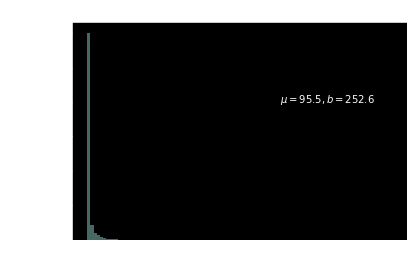

In [7]:
hist_caudal = df['caudal'].plot.hist(title='Histograma Caudal', bins=100, alpha=0.5)
hist_caudal.set(xlabel='Caudal', ylabel='Frecuecia')
hist_caudal.text(10000, 800000, r'$\mu=95.5, b=252.6$')


Text(-10, 30000, '$\\mu=19.2, b=7.3$')

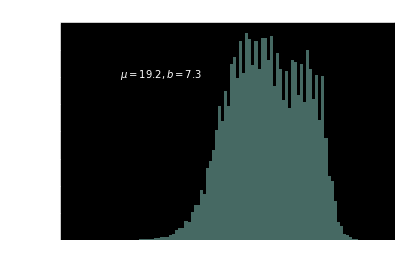

In [8]:
hist_temp = df['temp_max_promedio'].plot.hist(title='Histograma Temperatura Máxima', bins=100, alpha=0.5)
hist_temp.set(xlabel='Temperatura', ylabel='Frecuecia')
hist_temp.text(-10, 30000, r'$\mu=19.2, b=7.3$')


Text(100, 800000, '$\\mu=1.9, b=7.4$')

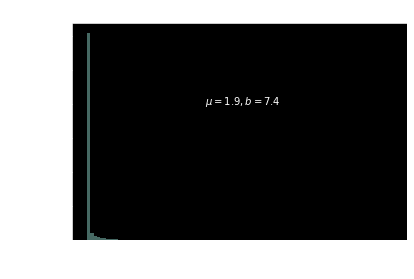

In [9]:
hist_precip = df['precip_promedio'].plot.hist(title='Histograma  Precipitaciones', bins=100, alpha=0.5)
hist_precip.set(xlabel='Precipitación', ylabel='Frecuecia')
hist_precip.text(100, 800000, r'$\mu=1.9, b=7.4$')


La temperatura sigue una distribución normal, mientras que el caudal y la precipitación siguen un distribución de poisson con una media mu pequeña.
Llama mucho la atención de la distribución de los datos de precipitación y caudal. Pienso que será dificil modelar el comportamiento para grandes cantidades de caudales o precipitaciones,
debido a que en general los datos son muy cercanos a 0 y hay poca representatividad de valores grandes.

Revisamos la cantidad de datos que se importaron por defecto como NaN en cada columna.

In [10]:
df.isna().sum()


id                        0
codigo_estacion           0
altura                    0
latitud                   0
longitud                  0
codigo_cuenca             0
caudal                    0
precip_promedio       27767
temp_max_promedio    151563
dtype: int64

Se encuentra que sólo las columnas **precip_promedio** y **temp_max_promedio** tenían datos sin definir.

Para el caso de precipitaciones promedio, 27767 datos están indefinidos, lo que representa un 1.97% del total de esas mediciones.
Mientras tanto, para el caos de temperaturas máximas promedio, 151563 datos están indefinidos, lo que representa un 10.74% del total de esas mediciones.

Para poder entender mejor si los datos indefinidos provienen de cuencas sin estaciones de monitoreo de temperatura o precipitación,
se mostrarán la cantidad de estaciones (codigo_estacion) por cuenca y el porcentaje de mediciones indefinidas de temperatura por estación.

In [11]:
codigos_cuencas, codigos_estaciones= df['codigo_cuenca'].unique(), df['codigo_estacion'].unique()


In [12]:
for i, codigo in enumerate(codigos_cuencas):
    print('{:3}: {:2}'.format(codigo, df[df['codigo_cuenca'] == codigos_cuencas[i]]['codigo_estacion'].unique().shape[0]))


45:  8
 54:  4
 81:  6
 47:  7
 34:  6
 43:  5
 57:  8
 91:  4
 73: 11
 32:  7
 38:  7
 71:  2
 10:  3
 83: 15
113:  7
 21:  8
 52:  1
111:  3
 12:  1
 94:  2
103:  2
122:  3
104:  1
110:  1
 60:  3
115:  4
107:  1
117:  2
128:  1


In [13]:
for i, codigo in enumerate(codigos_estaciones):
    cantidad_nan = df[df['codigo_estacion'] == codigos_estaciones[i]]['temp_max_promedio'].isna().sum()
    total = df[df['codigo_estacion'] == codigos_estaciones[i]]['temp_max_promedio'].count()
    print(codigo, (cantidad_nan/total)*100)


4523002 15.661880123248647
5423003 18.992621110041707
8106001 22.624269005847953
4716001 18.416610398379476
8132001 8.78251541968356
3431001 19.618973054087558
4716004 6.039382283713187
4320001 27.108247103290168
4308001 34.00585746827205
5710001 4.48392997125686
9123001 35.52809292274446
4711001 7.457673589690864
4550003 27.377220480668758
8135002 13.994152046783626
7355002 25.4468085106383
4323001 20.174612147478175
5704002 5.834534447967714
4513001 21.309241706161135
2110002 17.014207149404218
4558001 8.486629444607699
4540001 20.583333333333336
9129002 35.46519366431519
3430001 23.501374885426216
3806001 25.380116959064324
5734001 16.642029098264995
5737002 0.01018796800978045
4503001 34.924500730638094
5410002 13.135176483444432
8133001 31.334652259929996
4535002 25.9917212832011
3820003 23.632666892578786
4730001 0.9971509971509971
5421001 21.75933344015382
5410005 7.393449362751816
7322001 8.040321612864515
7355001 20.6574024585783
7116001 17.366051034392743
7335001 27.884747627

Se esperaría que las estaciones que no tengan medidores de temperatura tengan un 100% de datos NaN, lo que no se da en este caso.
Otra posibilidad es que los datos NaN correspondan a los primeros de la serie de tiempo par cada
estación, lo que mostraría que los datos NaN corresponden a fechas donde todavía no se implementaba un sensor en la estación.
Si existen datos sin definir intermedios se tomará como una falla en la medición para esa estampa de tiempo.

Por restricciones de tiempo no revisaremos cada caso, pero graficaremos en el siguiente punto algunas mediciones de
precipitaciones, temperatura y caudal para ver si las posiciones NaN son intermedias o al principio de la serie de tiempo.

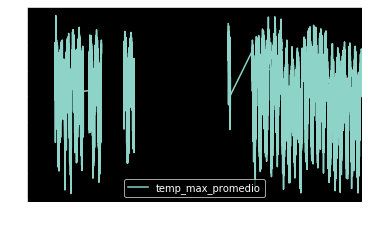

In [14]:
df[df['codigo_estacion'] == 5423003].plot(y='temp_max_promedio')


TODO: hacer gráfico donde se muestre cada cuenca y los valores de mediciones indeterminadas

## Pregunta 3
a. Escribir una función que tome como input una estación
y haga plot de los datos para una columna.

In [15]:
def time_plot_una_estacion(dataframe, codigo_estacion, columna, fecha_min, fecha_max):
    df_aux = df[fecha_min:fecha_max].copy()
    return df_aux[df_aux['codigo_estacion'] == codigo_estacion].plot(y=columna)


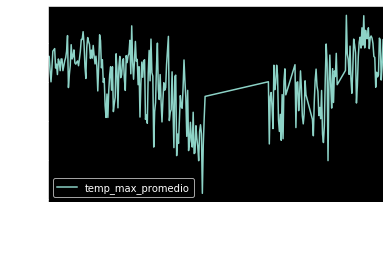

In [16]:
time_plot_una_estacion(df ,4540001, 'temp_max_promedio', '1968-01','1968-12')


Por ejemplo en la figura anterior se ve que existen meses o días sin medida para la estación
4540001, lo que indicaría que existen fallas de medida para este caso en particular.

3.b. Función que haga plots de varias columnas, para poder visualizar
caudal, precipitación y temperatura al mismo tiempo.

TODO: mejorar dividir por el primer valor que no sea NaN o 0 en la serie.

In [17]:
def time_plot_estaciones_varias_columnas(dataframe, codigo_estacion, columnas, fecha_min, fecha_max):
        df_aux = df[fecha_min:fecha_max].copy()
        for column in columnas:
            df_aux[[column]] = df_aux[[column]]/df_aux[[column]].values[0]
        return df_aux[df_aux['codigo_estacion'] == codigo_estacion].plot(y=columnas)

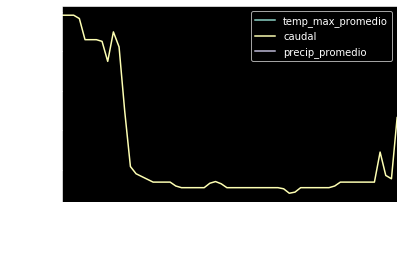

In [18]:
columnas_plot = ['temp_max_promedio', 'caudal', 'precip_promedio']
time_plot_estaciones_varias_columnas(df, 4540001, columnas_plot, '1974-06','1974-09')


## Pregunta 4
Primero vamos a crear 4 variables que contengan los ragos de tiempo para las estaciones del año.

Para el caso de considerar la distribución histórica, se considerará la de las estaciones hasta el momento de la medición,
esto es, si para el 01 de marzo de 1970 se tiene cierta medición de caudal/temperatura/precipitación,
entonces para elegir si está por sobre o debajo del 95 percentil se tomarán todas las medidas de
verano anteriores a esa fecha.

También se podría haber tomado el valor histórico de toda la serie de tiempo, pero captura la idea de
valores "mayores a lo esperado" como lo hace lo descrito en el párrafo anterior (valores esperados son mirando al pasado).

Para simplificar tomaremos de enero-marzo como verano, sin contar que la estación cambia cerca del 21 del mes.
Lo mismo se hará para las demás estaciones del año.

In [19]:
verano = ((df.index.month >= 1) & (df.index.month <= 3))
otono = ((df.index.month >= 4) & (df.index.month <= 6))
invierno = ((df.index.month >= 7) & (df.index.month <= 9))
primavera = ((df.index.month >= 10) & (df.index.month <= 12))


In [20]:
estaciones_tiempo = (verano, otono, invierno, primavera)


Las 6 celdas siguientes sólo muestran porque un percentil agregado puede traer problemas,
especialmente por su comportamiento transitorio en un principio, debido a los pocos datos tomados
desde un inicio, lo que se va acotando en la medida que los datos aumentan y estos son menos relevantes
para la historria completa.

Con esto se decide que la mejor forma por ahora es volver al inicio y tomar el percentil del total.

En el futuro se podría probar con un percentil movil con el tamaño de ventana como parámetro y con corrección de bias inicial.

In [21]:
test = df[verano].copy()


Se tomaron sólo las mediciones de verano de la estación "4540001"

In [22]:
test_array = test[test['codigo_estacion'] == 4540001]['temp_max_promedio'].dropna().values


In [23]:
np.percentile(test_array, 95)


30.975000381469698

 Se calcula el percentil mirando sólo los datos pasados en cada timestep.

In [24]:
temp_aux = []
percentile = []
for i, item in enumerate(test_array):
    temp_aux = np.append(temp_aux, item)
    percentile = np.append(percentile, np.percentile(temp_aux, 95))


In [25]:
temp_max = []
for i, item in enumerate(test_array):
    if item > percentile[i]:
        temp_max = np.append(temp_max, 1)
    else:   
        temp_max = np.append(temp_max, 0)


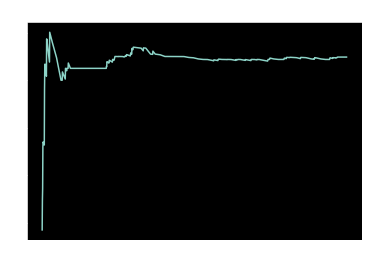

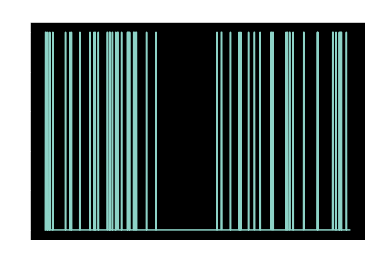

In [26]:
plt.plot(percentile)
plt.title('Percentil mirando al pasado')
plt.show()
plt.plot(temp_max)
plt.title('Eventos extremos')
plt.show()


Se ve como el percentil se mueve en torno a los 30.7 aprox rápidamente al pasar el tiempo.
Sin embargo, en los datos iniciales se genera una transiente que distorsiona los datos extremos, como se puede ver
en el gráfico de los eventos extremos en un inicio. Por esto se tomarán por ahora todos los datos de la serie de tiempo (separados por sus estaciones y temporadas anuales).

In [27]:
caudal_extremo = {}
# Pasamos por cada una de las estaciones del tiempo.
for estacion_tiempo in estaciones_tiempo:
    df_temporada = df[estacion_tiempo].copy()
    for codigo_estacion in codigos_estaciones:
        df_estacion = df_temporada[df_temporada['codigo_estacion'] == codigo_estacion].copy()
        # Para calcular el percentil correspondiente se eliminan los datos inválidos.
        caud_percentile = df_estacion['caudal'].dropna().quantile(0.95)
        for row in df_estacion.itertuples():
            caudal = row.caudal
            if caudal > caud_percentile:
                caudal_extremo[row.id] = 1
            # Comparar con un NaN
            elif np.isnan(caudal):
                caudal_extremo[row.id] = np.nan
            else:  
                caudal_extremo[row.id] = 0


Se hace lo mismo para temperatura y precipitaciones.
TODO: En una futura iteración se puede definir una función para limpiar el código y hacerlo escalable con otras funciones.

In [28]:
temp_extremo = {}
# Pasamos por cada una de las estaciones del tiempo.
for estacion_tiempo in estaciones_tiempo:
    df_temporada = df[estacion_tiempo].copy()
    for codigo_estacion in codigos_estaciones:
        df_estacion = df_temporada[df_temporada['codigo_estacion'] == codigo_estacion].copy()
        # Para calcular el percentil correspondiente se eliminan los datos inválidos.
        temp_percentile = df_estacion['temp_max_promedio'].dropna().quantile(0.95)
        for row in df_estacion.itertuples():
            temp = row.temp_max_promedio
            if temp > temp_percentile:
                temp_extremo[row.id] = 1
            # Comparar con un NaN
            elif np.isnan(temp):
                temp_extremo[row.id] = np.nan
            else:  
                temp_extremo[row.id] = 0


In [29]:
precip_extremo = {}
# Pasamos por cada una de las estaciones del tiempo.
for estacion_tiempo in estaciones_tiempo:
    df_temporada = df[estacion_tiempo].copy()
    for codigo_estacion in codigos_estaciones:
        df_estacion = df_temporada[df_temporada['codigo_estacion'] == codigo_estacion].copy()
        # Para calcular el percentil correspondiente se eliminan los datos inválidos.
        prec_percentile = df_estacion['precip_promedio'].dropna().quantile(0.95)
        for row in df_estacion.itertuples():
            precip = row.precip_promedio
            if precip > prec_percentile:
                precip_extremo[row.id] = 1
            # Comparar con un NaN
            elif np.isnan(precip):
                precip_extremo[row.id] = np.nan
            else:  
                precip_extremo[row.id] = 0


Aprovechando el id único de los datos, se mapean las variables al DataFrame original.

In [30]:
df['caudal_extremo'] = df['id'].map(caudal_extremo)
df['temp_extremo'] = df['id'].map(temp_extremo)
df['precip_extremo'] = df['id'].map(precip_extremo)


Para poder revisar las distintas variables  se puede hacer un gráfico de los eventos extremos
acumulados para cada variable. Esto está lejos de ser óptimo visualmente, pero permite ver rápidamente
la relación de los eventos para cada una de las variables.

[]

/home/fabian/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/fabian/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


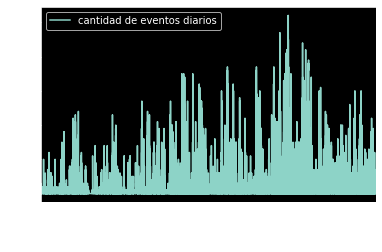

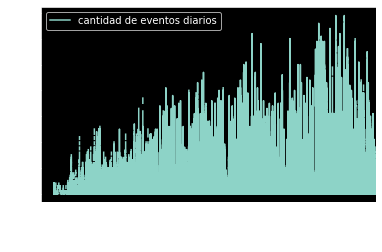

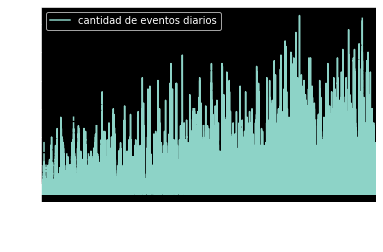

In [31]:
caudal_plot = df['caudal_extremo'].groupby('dt').agg(['cumsum']).plot()
temp_plot = df['temp_extremo'].groupby('dt').agg(['cumsum']).plot()
precip_plot = df['precip_extremo'].groupby('dt').agg(['cumsum']).plot()

caudal_plot.set(xlabel='fecha', ylabel='caudal extremo')
caudal_plot.legend(['cantidad de eventos diarios'])
temp_plot.set(xlabel='fecha', ylabel='temperatura extrema')
temp_plot.legend(['cantidad de eventos diarios'])
precip_plot.set(xlabel='fecha', ylabel='precipitación extrema')
precip_plot.legend(['cantidad de eventos diarios'])

caudal_plot.plot()
temp_plot.plot()
precip_plot.plot()

Es interesante ver los datos agregados por fechas,
aunque se debe tomar en cuenta que las estaciones de monitoreo no tienen datos distribuidos
en los mismo rangos de tiempo muchas veces, por lo que agregarlos de esta forma puede ser engañoso.

Por eso se procede a responder la pregunta 5 al ver el comportamiento por estaciones.

## Pregunta 5
Vamos a hacer gráficos en el tiempo de eventos extremos, pero diferenciando por cuenca.

/home/fabian/miniconda3/envs/ml/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


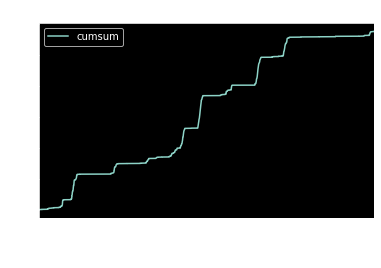

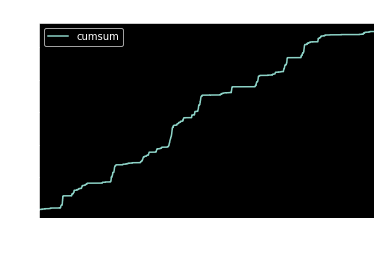

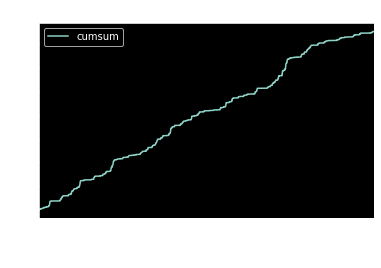

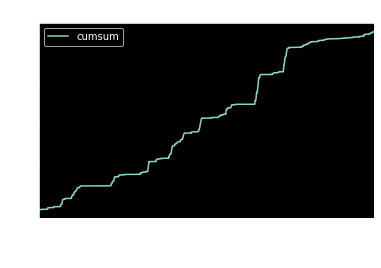

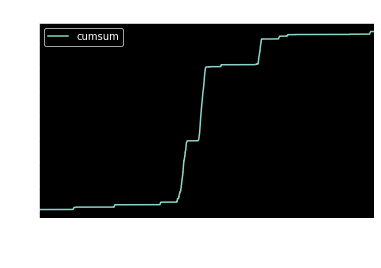

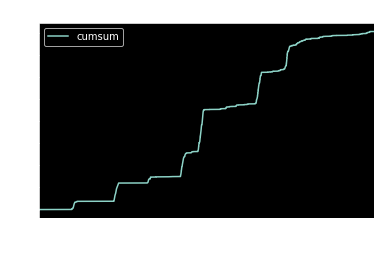

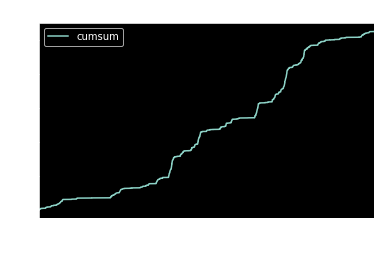

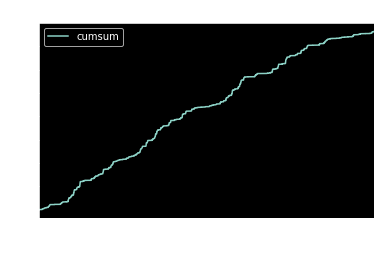

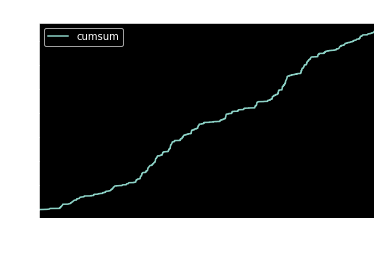

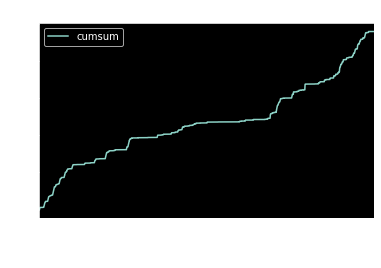

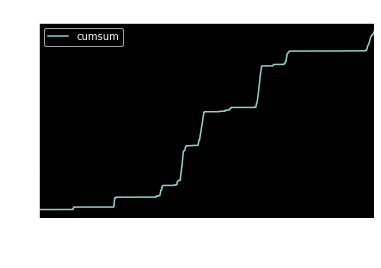

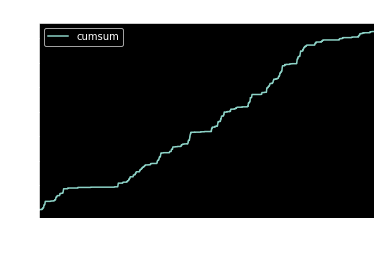

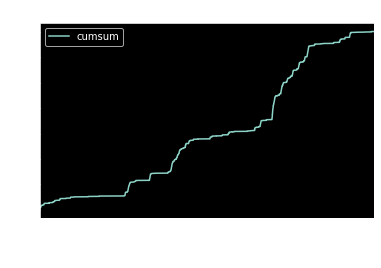

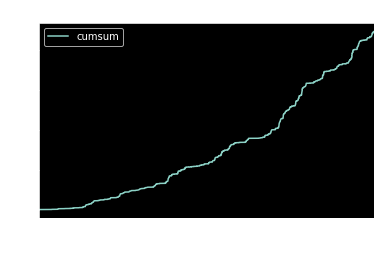

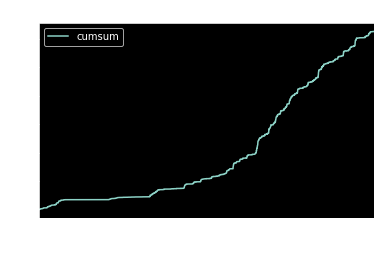

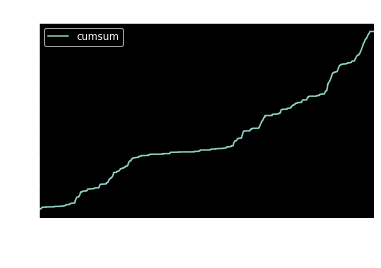

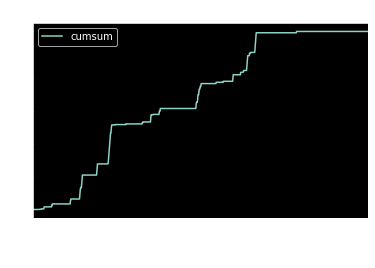

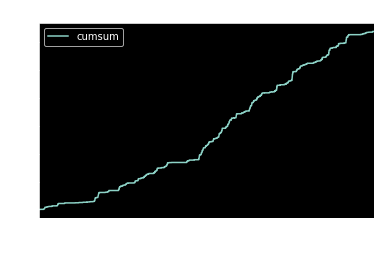

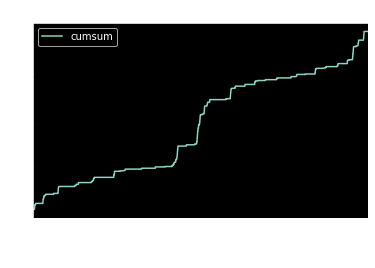

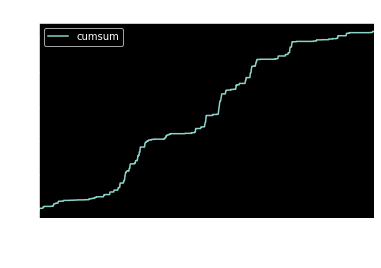

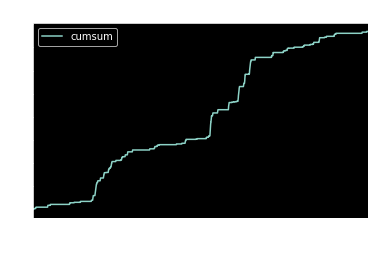

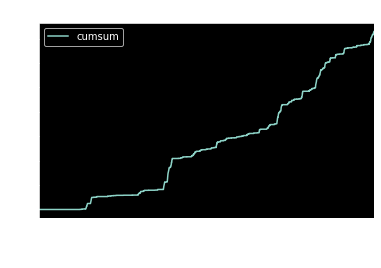

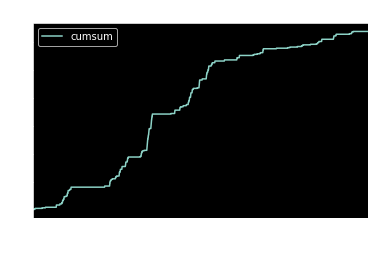

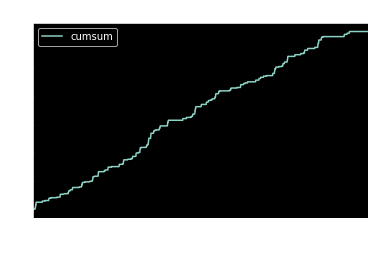

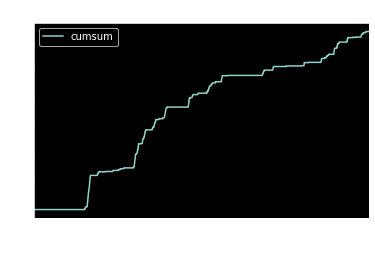

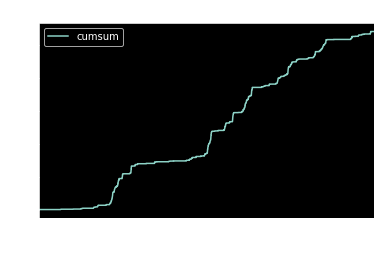

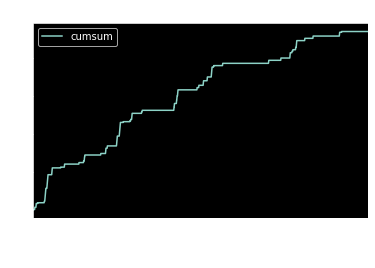

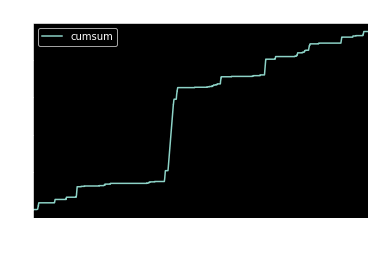

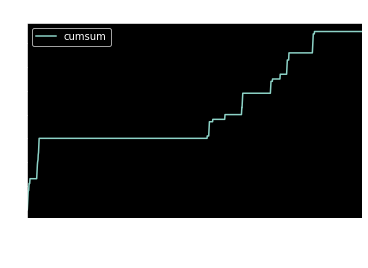

In [32]:
for cuenca in codigos_cuencas:
    cuenca = df['caudal_extremo'][df['codigo_cuenca'] == cuenca].agg(['cumsum']).plot(title=cuenca)


Efectivamente el comportamiento de algunas cuencas es diferentes para el caudal extremo.
Algunas tienen un comportamiento casi lineal, mientras que otras tienen un valle durante la decada de los 90s
para luego volver a aumentar. En otros casos, como en la cuenca 94 y 103, se han desacelerado los eventos
de caudal extremo en la decada del 2010.

Dado esto, podríamos agregar las cuencas que tengan comportamientos similares
para el modelo del punto 7.

Para analizar las diferentes cuencas haremos lo siguiente:

 1. Tomar subcuencas y analizar si los eventos extremos son similares entre ellas.
 2. Si las subcuencas son similares, entonces tomar una estación por cuenca para el análisis.
 3. Si las subcuencas no son similares, entonces nuestro análisis se hará por estación.

Lo anterior debido a que, dependiendo de la cuenca, se pueden tener varias estaciones,
lo que no hará comparable los resultados entre cuencas.

## Pregunta 6
Hagan un plot del porcentaje de eventos extremos a través del tiempo (caudal_extremo,
temp_extremo, precip_extremo). Se han vuelto más o menos comunes?

Primero se hará un resample de todos los datos extremos por trimestre, sin contar los indeterminados.

In [33]:
caudal_ano = df['caudal_extremo'].resample('Q').count()
temp_ano = df['temp_extremo'].resample('Q').count()
precip_ano = df['precip_extremo'].resample('Q').count()


Se calculan todos los eventos extremos, haciendo un resample por trimestre.

In [34]:
caudal_extremo_ano = df['caudal_extremo'].resample('Q').sum()
temp_extremo_ano = df['temp_extremo'].resample('Q').sum()
precip_extremo_ano = df['precip_extremo'].resample('Q').sum()


Con lo anterior se puede sacar el porcentaje de eventos extremos por trimestre,
para ver si estos han subido a bajado en frecuencia.

In [35]:
caudal_porcent = (caudal_extremo_ano/caudal_ano)*100
temp_porcent = (temp_extremo_ano/temp_ano)*100
precip_porcent = (precip_extremo_ano/precip_ano)*100


/home/fabian/miniconda3/envs/ml/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


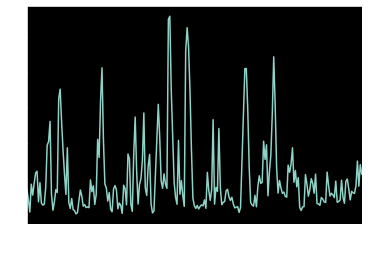

In [36]:
caudal_porcent.plot()

Los eventos extremos de caudal han disminuido durante la última decada.

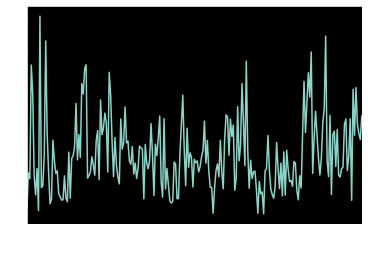

In [37]:
temp_porcent.plot()


Los eventos extremos de temperatura han aumentado durante la última decada.

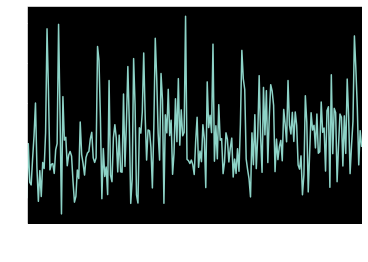

In [38]:
precip_porcent.plot()

Los eventos extremos de precipitaciones habría que analizarlos con mayor detalle.

## Pregunta 7 y 8
### Modelos
Para este caso en particular eliminaremos los datos NaN. Esto tendrá el problema de romper el step de la serie de tiempo.
Para otra iteración ver como imputar los datos. También se podría usar un valor que sabemos que caudal, precipitación o temperatura máxima diaria no alcanza
para ver si el modelo aprende que cuando hay NaN, entonces el resultado
también debiese ser NaN. Si una de las variables antes mencionadas tienen un NaN en la fila, entonces la fila completa lo tendrá.

Por ahora sólo se usaran los datos que se han obtenido hasta ahora, pero por ejemplo se podrían
crear 3 variables más, correspondientes a las derivadas de la temperatura máxima promedio, precipitación promedio y caudal.

In [39]:
#dataset = df[['codigo_estacion','codigo_cuenca','caudal','precip_promedio','temp_max_promedio','caudal_extremo','temp_extremo','precip_extremo',]].dropna().copy()
dataset = df[['caudal','precip_promedio','temp_max_promedio']].dropna().copy()

#for column in dataset.columns:
#    dataset[column] = dataset[column].fillna(dataset[column][:1900000].mean())


Para hacer el modelo comenzaremos por modelar sólo el caudal extremo para una estación.

In [42]:
dataset = df[['codigo_estacion','codigo_cuenca','caudal','precip_promedio','temp_max_promedio','caudal_extremo','temp_extremo','precip_extremo',]].dropna().copy()
#dataset = df[['caudal','precip_promedio','temp_max_promedio']].dropna().copy()

#for column in dataset.columns:
#    dataset[column] = dataset[column].fillna(dataset[column][:1900000].mean())


In [43]:
dataset_prueba = dataset[dataset['codigo_estacion'] == 8140002][['caudal','precip_promedio','temp_max_promedio','caudal_extremo','temp_extremo','precip_extremo']].sort_index().values




### Redes neuronales recurrentes
Se usarán en una primera instancia una red neuronal recurrente, que tomará un batch de datos,
mirando 32 días hacia atrás y prediciendo con eso el caudal extremo para el día siguiente.
El paso será de un día y cada batch será de 64 muestras.

In [44]:
#mean = dataset_prueba[:3500].mean(axis=0)
#dataset_prueba -= mean
#std = dataset_prueba[:3500].std(axis=0)
#dataset_prueba /= std


Se usa un generador para entregar datos de entrenamiento y validación a la red.
La salida del modelo es la cuarta posición del arreglo.

In [57]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        X = np.zeros((len(rows), lookback // step, data.shape[-1]))
        y = np.zeros((len(rows),))
    
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            X[j] = data[indices]
            y[j] = data[rows[j] + delay][3]
        
        yield X, y


In [58]:
# lookback es la cantidad de días que estoy mirando hacia atrás.
# Se usará 32 que es aprox 1 meses de datos. 
lookback = 32
# paso para la muestra, por ejemplo en este caso en que cada muestra representa
# un día, un step de 7 tomaría una muestra por semana.
step = 1
# Delay representa la cantidad de pasos mirando hacia el futuro. En este caso
# 1 sería para poder calcular el caudal del día siguiente, teniendo las muestras de los 
# días anteriores.
delay = 1
batch_size = 64

train_gen = generator(dataset_prueba,
                    lookback=lookback,
                    delay=delay,
                    min_index=0,
                    max_index=3499,
                    shuffle=False,
                    step=step,
                    batch_size=batch_size)
val_gen = generator(dataset_prueba,
                    lookback=lookback,
                    delay=delay,
                    min_index=3500,
                    max_index=3999,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(dataset_prueba,
                    lookback=lookback,
                    delay=delay,
                    min_index=4000,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)
val_steps = (3999 - 3500 - lookback)
test_steps = (len(dataset_prueba) - 4000 - lookback)


Se usará una red con una capa GRU de 32 unidades escondidas y luego se condensará un una sóla en la siguiente capa, con
una función sigmoide de activación. Se usará la función de pérdida crossentropy, y se optimizará el modelo usando el algoritmo Adam por su eficiencia.
En un principio intentaremos entrenar la red sin estándarizar los datos, lo que puede provocar problemas de llegar al óptimo.

In [59]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam

model = Sequential()
model.add(layers.GRU(32, activation='relu',
                    input_shape=(None, dataset_prueba.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_gen,
                            steps_per_epoch=50,
                            epochs=20,
                            validation_data=val_gen,
                            validation_steps=val_steps)


Epoch 1/20
50/50 [==============================] - 5s 90ms/step - loss: 8.9296 - acc: 0.2312 - val_loss: 0.6706 - val_acc: 0.9088
Epoch 2/20
50/50 [==============================] - 4s 77ms/step - loss: 0.6013 - acc: 0.9328 - val_loss: 0.1905 - val_acc: 0.9776
Epoch 3/20
50/50 [==============================] - 4s 78ms/step - loss: 0.5109 - acc: 0.9456 - val_loss: 0.2103 - val_acc: 0.9776
Epoch 4/20
50/50 [==============================] - 4s 79ms/step - loss: 0.5000 - acc: 0.9375 - val_loss: 0.1782 - val_acc: 0.9823
Epoch 5/20
50/50 [==============================] - 4s 73ms/step - loss: 0.4255 - acc: 0.9325 - val_loss: 0.1276 - val_acc: 0.9821
Epoch 6/20
50/50 [==============================] - 4s 71ms/step - loss: 0.3627 - acc: 0.9378 - val_loss: 0.1160 - val_acc: 0.9821
Epoch 7/20
50/50 [==============================] - 4s 76ms/step - loss: 0.3318 - acc: 0.9378 - val_loss: 0.1185 - val_acc: 0.9843
Epoch 8/20
50/50 [==============================] - 4s 78ms/step - loss: 0.2844 - a

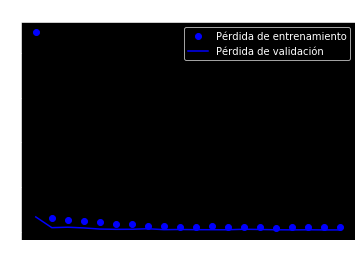

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.legend()
plt.show()


In [62]:
y_pred = model.predict(X_test, batch_size=64)
print(y_pred)


[[3.20629869e-03]
 [1.50028765e-02]
 [2.56560128e-02]
 [2.19884813e-02]
 [9.87533666e-03]
 [7.27203162e-03]
 [6.36671670e-03]
 [7.79730733e-03]
 [3.69002633e-02]
 [3.00344136e-02]
 [1.58047900e-02]
 [1.97225623e-02]
 [1.43891452e-02]
 [8.84808693e-03]
 [6.28146715e-03]
 [1.00289835e-02]
 [1.35871219e-02]
 [1.35121886e-02]
 [1.21893436e-02]
 [9.70228016e-03]
 [9.28398967e-02]
 [4.79497351e-02]
 [1.45091284e-02]
 [6.62753731e-02]
 [4.13648523e-02]
 [1.04043916e-01]
 [2.09263451e-02]
 [4.30388711e-02]
 [5.93833625e-02]
 [1.19247712e-01]
 [3.69066768e-03]
 [6.01645466e-03]
 [8.50826129e-03]
 [4.00764868e-03]
 [6.38634264e-02]
 [9.40253772e-03]
 [1.15297260e-02]
 [7.76828034e-03]
 [6.17685291e-05]
 [1.17021501e-02]
 [8.40655994e-03]
 [4.86761332e-03]
 [4.49390197e-03]
 [3.61837610e-03]
 [4.46516974e-03]
 [7.45561020e-03]
 [7.40094017e-03]
 [5.21000009e-03]
 [4.67028888e-03]
 [7.19904155e-03]
 [4.85223392e-03]
 [3.69913923e-03]
 [4.87916451e-03]
 [5.23692602e-03]
 [5.87523961e-03]
 [7.208740

In [63]:
print(y_test)


[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


El modelo no predice ningún evento de caudal extremo. Para este caso la métrica de accuracy no es buena
porque puedo tener un vector completo con 0s y aún asi tener un buen porcentaje. En este caso se debe usar
alguna métrica de clasificación binaria para dar cuenta de los casos negativos.

Para seguir trabajando con redes neuronales sería bueno agregar datos para poder alimentar mejor la red, queda pendiente.